In [4]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from scipy.stats import kruskal
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz

In [5]:
# Dataset
raw_cll_data = pd.read_csv("data/raw/Subset_CLL_healthy.csv", index_col=0).T

In [6]:
raw_cll_data.head()

,cg00000029,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,cg00000658,...,cg27665715,cg27665754,cg27665767,cg27665769,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123
GSM3516780,0.391044,0.944940,0.168399,0.785584,0.777683,0.886390,0.212150,0.272788,0.024269,0.944905,...,0.968230,0.846586,0.375084,0.156000,0.945618,0.952575,0.010028,0.231726,0.586082,0.890618
GSM3516781,0.418785,0.972309,0.178850,0.809741,0.739181,0.946501,0.213046,0.312932,0.023285,0.931444,...,0.964785,0.868003,0.388855,0.208762,0.912556,0.944053,0.016943,0.324670,0.499216,0.770775
GSM3516782,0.395356,0.958343,0.105140,0.756320,0.766035,0.907133,0.119476,0.214268,0.020101,0.935729,...,0.970756,0.866880,0.378406,0.229453,0.955072,0.953340,0.017561,0.161772,0.598483,0.931726
GSM3516783,0.381291,0.952636,0.077278,0.743590,0.904918,0.848572,0.104603,0.199395,0.020913,0.906122,...,0.962509,0.833291,0.346732,0.277422,0.953885,0.957935,0.018406,0.132998,0.649462,0.926988
GSM3516784,0.407951,0.933867,0.091846,0.755508,0.865612,0.883956,0.184741,0.320936,0.025603,0.910838,...,0.966987,0.846796,0.338295,0.299755,0.946938,0.956702,0.017972,0.247513,0.350739,0.915506


In [7]:
# Labels
table = pd.read_excel("data/raw/Table_info.xlsx", index_col=0)
table.head()

,IGHV_100,healthy_disease
Sample_name,,
GSM4056740,0.0,D
GSM4056718,0.0,D
GSM4056710,0.0,D
GSM4056713,0.0,D
GSM4056732,0.0,D


In [8]:
status_cll = pd.concat((raw_cll_data, table["healthy_disease"]), axis=1, sort=False)

In [9]:
status_cll.head()

,cg00000029,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,cg00000658,...,cg27665754,cg27665767,cg27665769,cg27665829,cg27665860,cg27665925,cg27665985,cg27666046,cg27666123,healthy_disease
GSM3516780,0.391044,0.944940,0.168399,0.785584,0.777683,0.886390,0.212150,0.272788,0.024269,0.944905,...,0.846586,0.375084,0.156000,0.945618,0.952575,0.010028,0.231726,0.586082,0.890618,H
GSM3516781,0.418785,0.972309,0.178850,0.809741,0.739181,0.946501,0.213046,0.312932,0.023285,0.931444,...,0.868003,0.388855,0.208762,0.912556,0.944053,0.016943,0.324670,0.499216,0.770775,H
GSM3516782,0.395356,0.958343,0.105140,0.756320,0.766035,0.907133,0.119476,0.214268,0.020101,0.935729,...,0.866880,0.378406,0.229453,0.955072,0.953340,0.017561,0.161772,0.598483,0.931726,H
GSM3516783,0.381291,0.952636,0.077278,0.743590,0.904918,0.848572,0.104603,0.199395,0.020913,0.906122,...,0.833291,0.346732,0.277422,0.953885,0.957935,0.018406,0.132998,0.649462,0.926988,H
GSM3516784,0.407951,0.933867,0.091846,0.755508,0.865612,0.883956,0.184741,0.320936,0.025603,0.910838,...,0.846796,0.338295,0.299755,0.946938,0.956702,0.017972,0.247513,0.350739,0.915506,H


In [10]:
# disase status report
report_status = pd.read_excel("data/process/STATUS/Report.xls", index_col=0)

In [11]:
report_status.head()

,Random Forest,Extra Trees,XGBC,Score,Impact
Marker,,,,,
cg24623422,True,True,False,2,0.103448
cg02095334,True,True,False,2,0.068966
cg02469297,True,True,False,2,0.068966
cg03240628,True,True,False,2,0.068966
cg06368369,True,True,False,2,0.068966


In [12]:
selected = report_status.index.tolist()
selected = selected + ["healthy_disease"]

In [13]:
selected

['cg24623422',
 'cg02095334',
 'cg02469297',
 'cg03240628',
 'cg06368369',
 'cg06752482',
 'cg06791473',
 'cg08195176',
 'cg08414647',
 'cg19240569',
 'cg24110396',
 'cg24972377',
 'cg25070803',
 'cg26561342',
 'healthy_disease']

In [14]:
# Selected data based on report
status_selected = status_cll.loc[:, selected]

In [ ]:
# Box plots for each of selected markers
for column in status_selected.columns:
    
    if column == "healthy_disease":
        break
    
    fig = plt.figure(figsize=(12,8), dpi=500)

    ax = fig.add_subplot()

    H = status_selected[status_selected["healthy_disease"] == "H"][[column, "healthy_disease"]]
    D = status_selected[status_selected["healthy_disease"] == "D"][[column, "healthy_disease"]]

    stats = kruskal(H[column].values, D[column].values, nan_policy="omit")
    print(stats)
    
    summary = pd.concat((H, D), axis=0, sort=False)
    summary["healthy_disease"].replace({"H": "Health", "D": "Disease"}, inplace=True)
    
    sns.scatterplot(data=summary, x="healthy_disease", y=column, ax=ax)
    sns.boxplot(data=summary, x="healthy_disease", y=column, ax=ax)
    
    ax.set_title(f"{column}, p-value: {stats[1]}")
    ax.set_xlabel("Disease status")
    ax.set_ylabel("Methylation level")
    
    fig.savefig(f"data/process/STATUS/plots/{column}.png")
 
    plt.show()
    plt.clf()

In [13]:
# tSNE

In [15]:
# Raw data
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
raw_pca = pca.fit_transform(raw_cll_data)

scaler = StandardScaler()
scaled_raw_data = scaler.fit_transform(raw_pca)

In [16]:
tsne_raw = TSNE(n_components=2, method="exact", random_state=101)
tsne_status_raw = tsne_raw.fit_transform(scaled_raw_data)

In [17]:
labels = np.array(table["healthy_disease"]).reshape(-1, 1)
raw_data_pca_prepared = np.concatenate((tsne_status_raw, labels), axis=1)

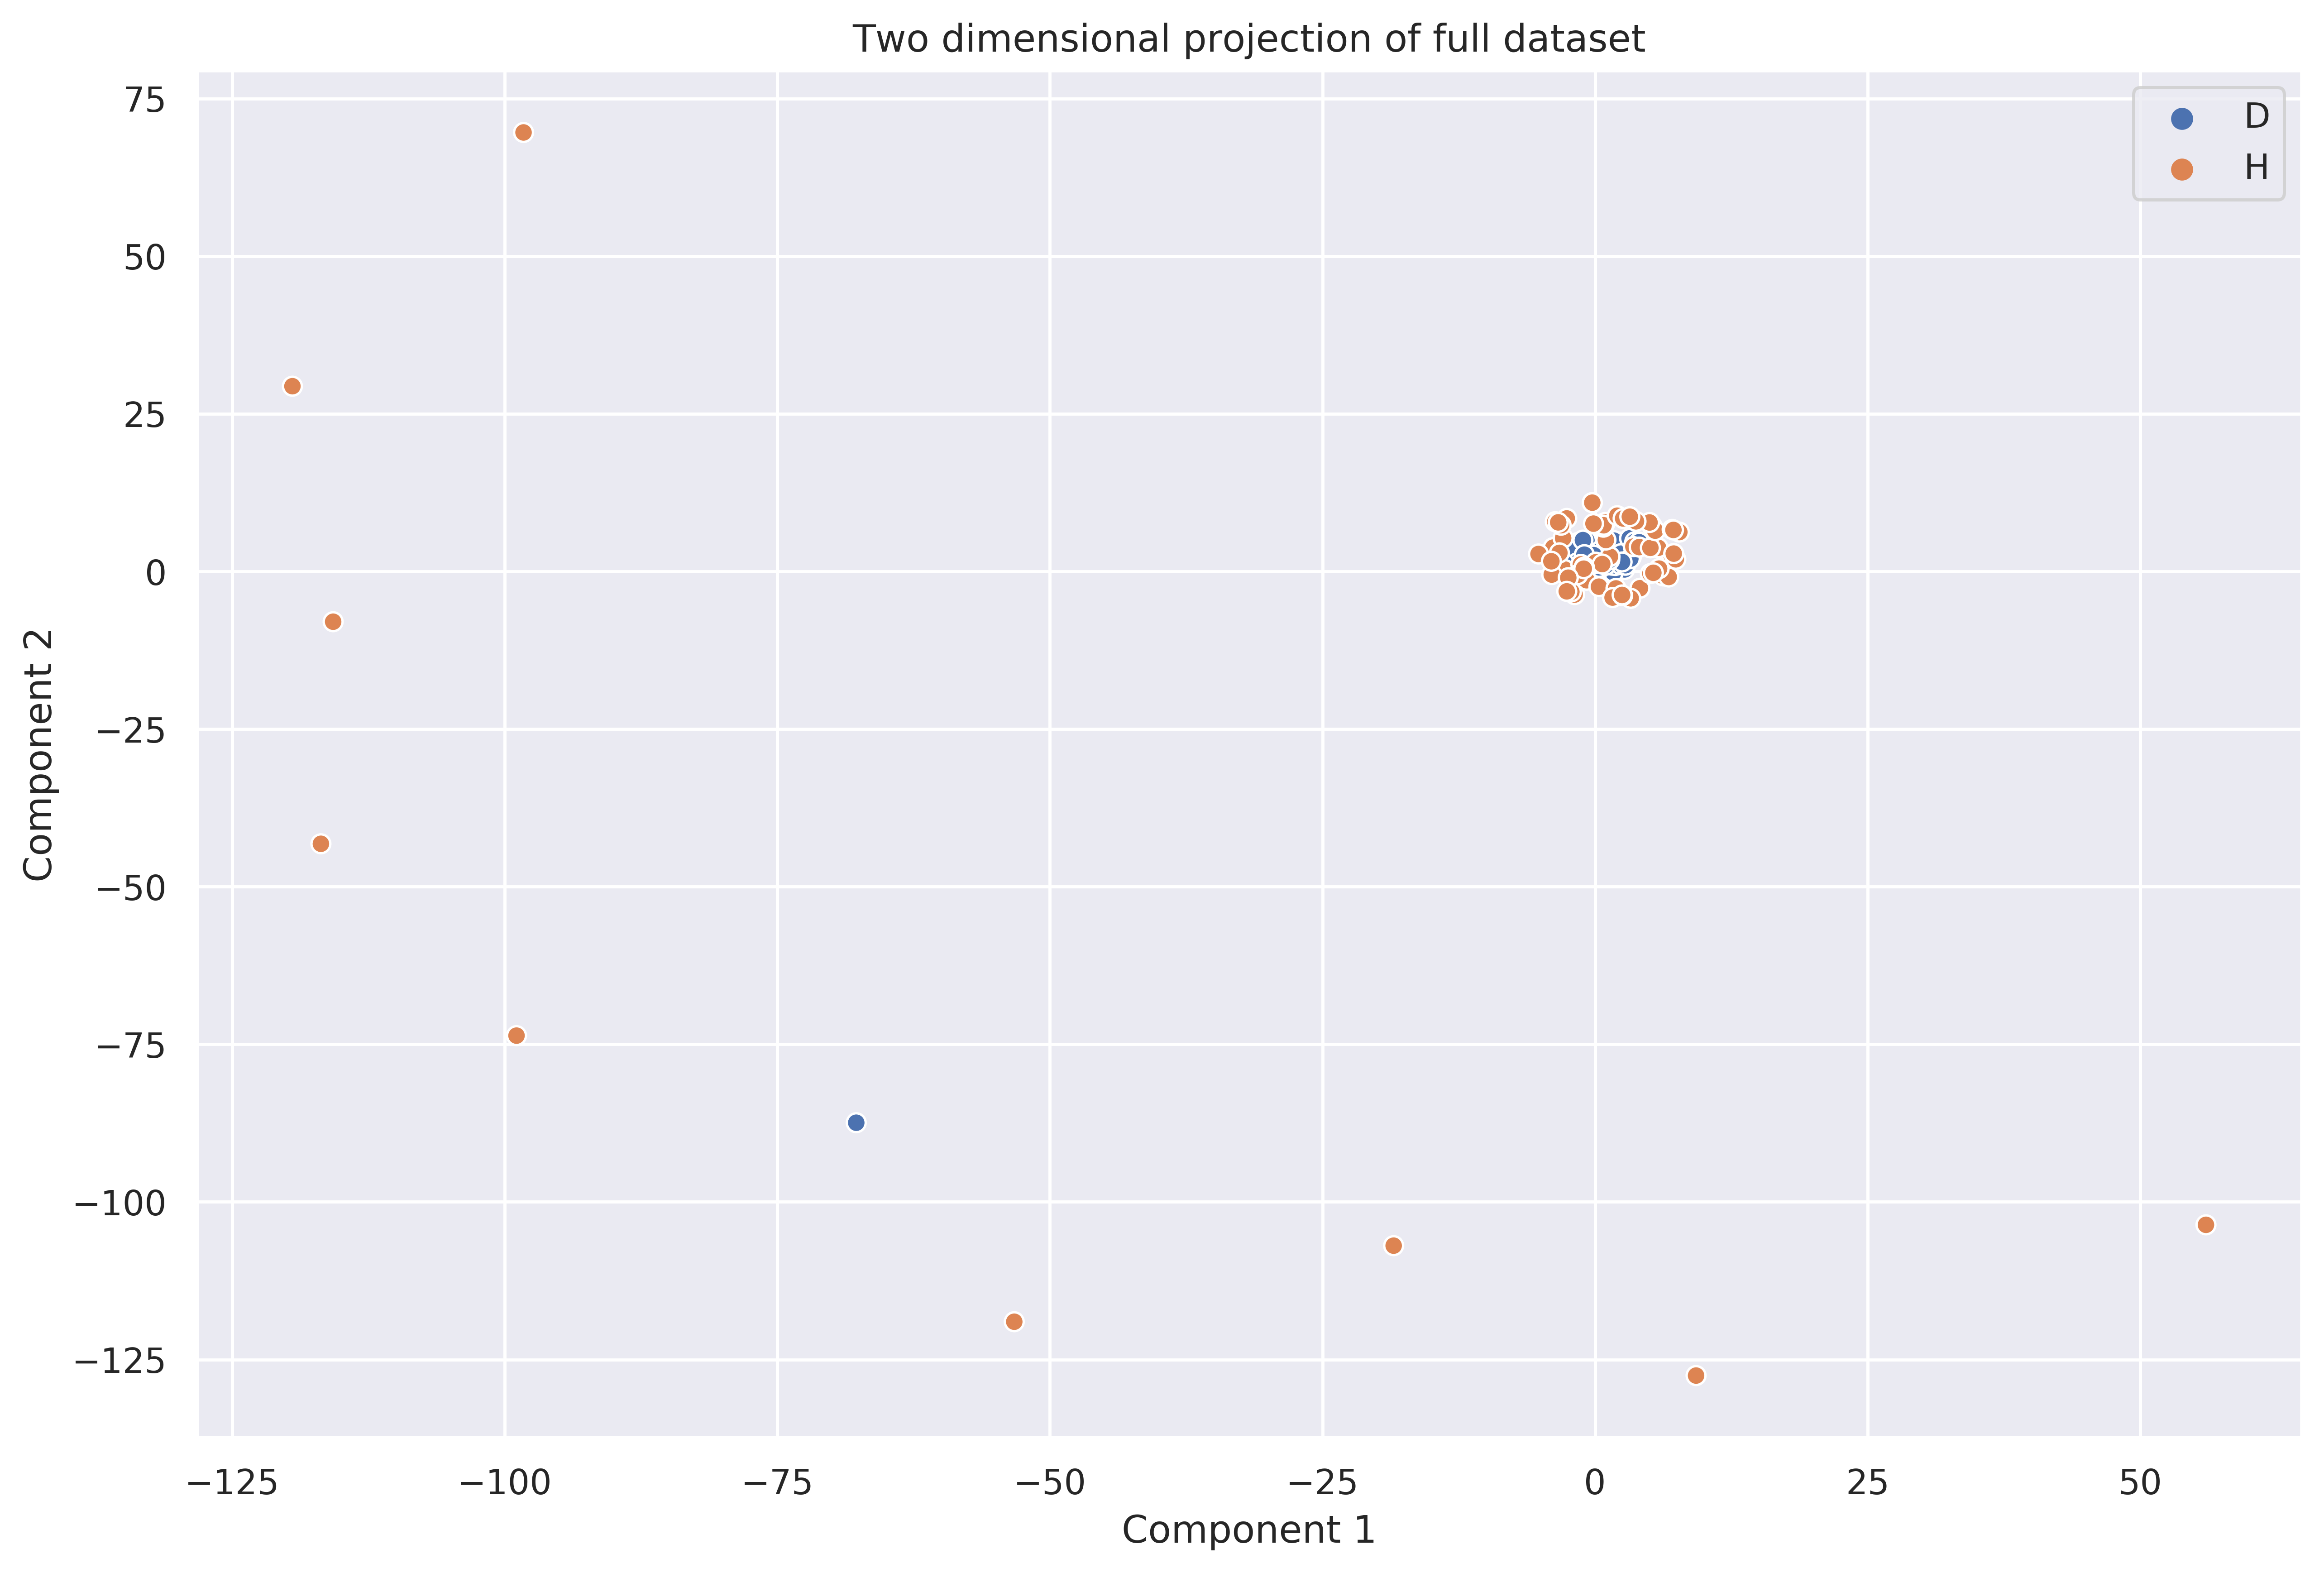

In [17]:
fig = plt.figure(figsize=(12,8), dpi=500)

ax = fig.add_subplot()

ax.set_title("Two dimensional projection of full dataset")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

sns.scatterplot(x=raw_data_pca_prepared[:, 0], y=raw_data_pca_prepared[:, 1], hue=raw_data_pca_prepared[:, 2], ax=ax)
fig.savefig(f"data/process/STATUS/plots/TSNE_raw.png")

plt.show()

In [18]:
# Selected data

In [18]:
scaler = StandardScaler()
scaled_status_cll = scaler.fit_transform(status_selected.drop("healthy_disease", axis=1))

In [19]:
tsne = TSNE(n_components=2, method="exact", random_state=101)
tsne_status = tsne.fit_transform(scaled_status_cll)

In [20]:
labels = np.array(status_selected["healthy_disease"]).reshape(-1, 1)
tsne_status = np.concatenate((tsne_status, labels), axis=1)

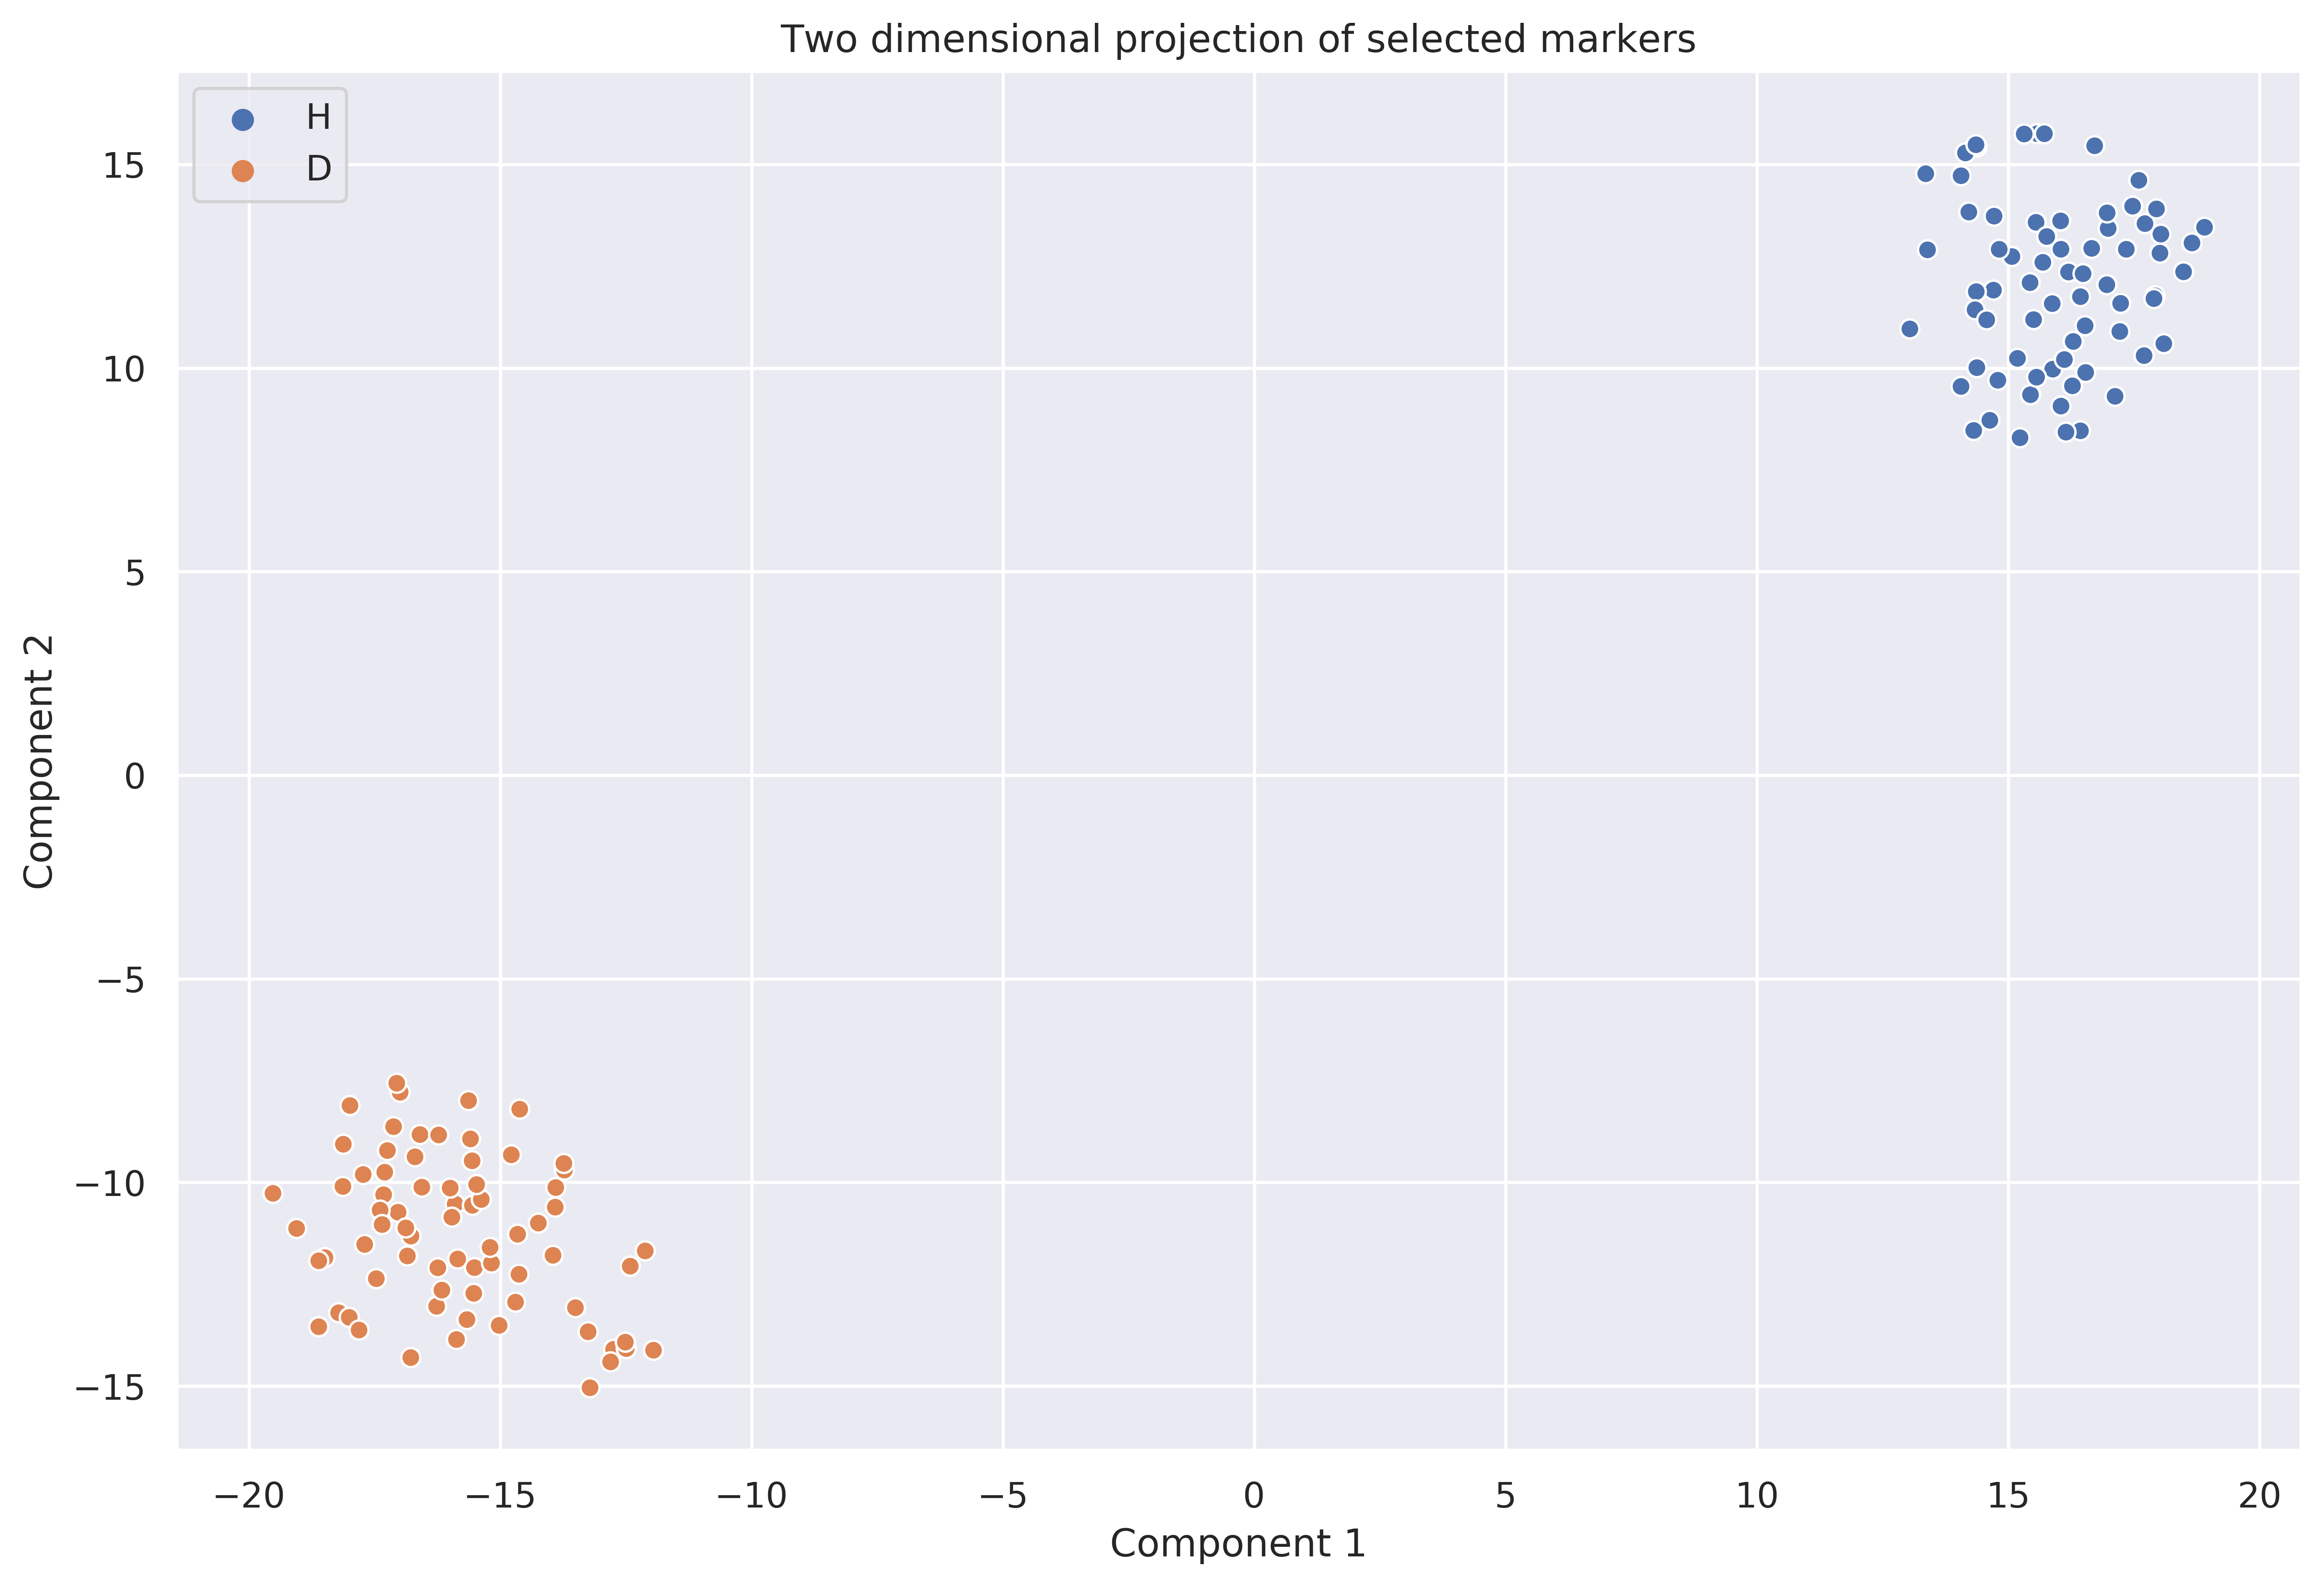

In [22]:
fig = plt.figure(figsize=(12,8), dpi=500)

ax = fig.add_subplot()

ax.set_title("Two dimensional projection of selected markers")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

sns.scatterplot(x=tsne_status[:, 0], y=tsne_status[:, 1], hue=tsne_status[:, 2], ax=ax)
fig.savefig(f"data/process/STATUS/plots/TSNE_selected_data.png")

plt.show()

In [23]:
# Clustering tSNE data

<Figure size 6000x4000 with 0 Axes>

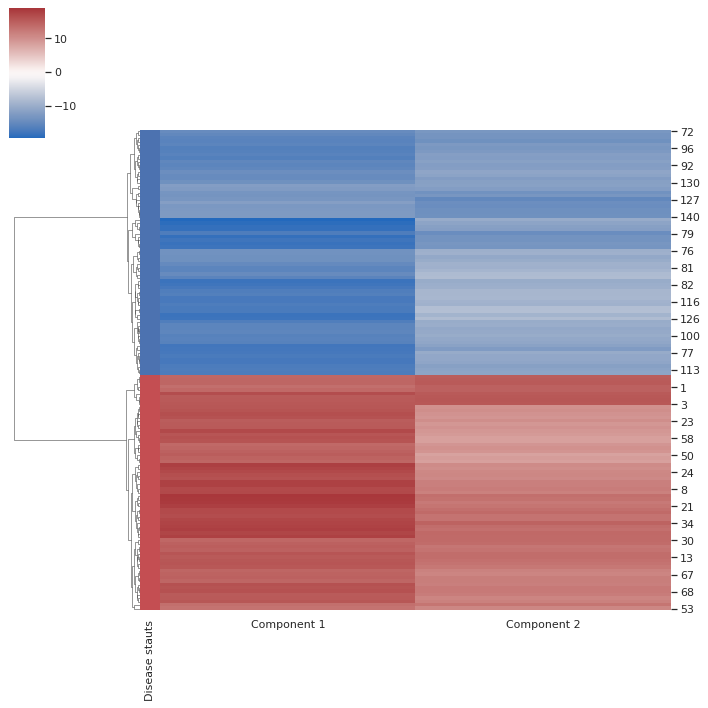

In [26]:
data = pd.DataFrame(tsne_status, columns=["Component 1", "Component 2", "Disease stauts"])

lut = dict(zip(data["Disease stauts"].unique(), "rbg"))
row_colors = data["Disease stauts"].map(lut)
data.pop("Disease stauts")

fig = plt.figure(figsize=(12,8), dpi=500)

sns.clustermap(data.astype(float), row_colors=row_colors, col_cluster=False, cmap="vlag")
fig.savefig(f"data/process/STATUS/plots/clustermap_on_tsne.png")

plt.show()

In [22]:
# Clustering of selected set of data

<Figure size 6000x4000 with 0 Axes>

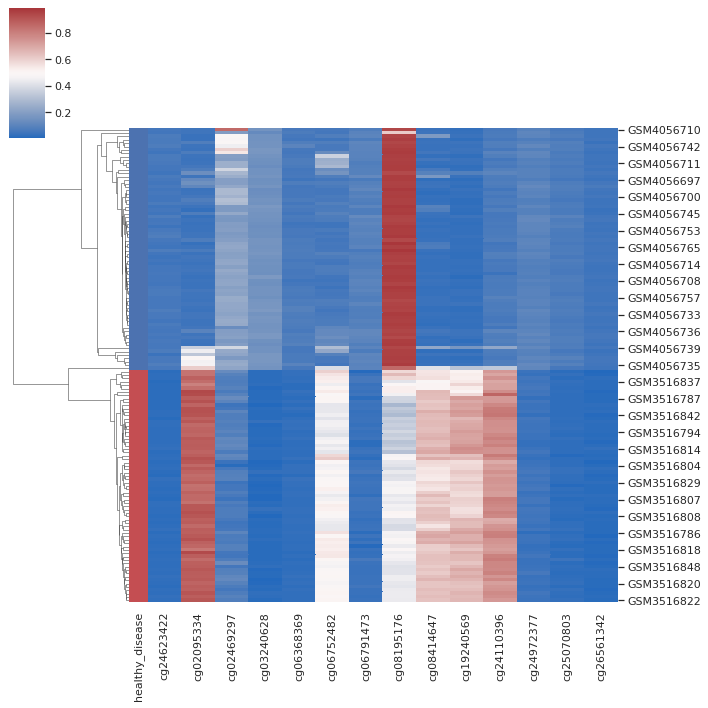

In [25]:
data = status_selected.copy()

lut = dict(zip(data["healthy_disease"].unique(), "rbg"))
row_colors = data["healthy_disease"].map(lut)
data.pop("healthy_disease")

fig = plt.figure(figsize=(12,8), dpi=500)

sns.clustermap(data.astype(float), row_colors=row_colors, col_cluster=False, cmap="vlag")
fig.savefig(f"data/process/STATUS/plots/clustermap_on_selected_data.png")

plt.show()

In [27]:
# Decision Trees

              precision    recall  f1-score   support

           D       1.00      1.00      1.00        27
           H       1.00      1.00      1.00        30

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



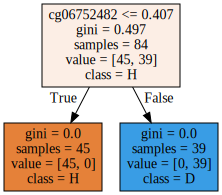

In [28]:
X = status_selected.drop("healthy_disease", axis=1)
y = status_selected["healthy_disease"]
markers = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.60)

tr = DecisionTreeClassifier(random_state=101)
tr.fit(X_train, y_train)
predicted = tr.predict(X_test)
print(classification_report(y_test, predicted))

dot_data = tree.export_graphviz(tr, filled=True, feature_names=markers, class_names=y.unique());
graph = graphviz.Source(dot_data)
graph.render(filename="Tree_disease_status", directory="data/process/STATUS/plots",\
             format="png") 
graph